<a href="https://colab.research.google.com/github/SourabhMehta-sm/Zero-shot-Sentiment-analysis/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


## Installing transformers

In [2]:
! pip install transformers

     |████████████████████████████████| 4.0 MB 5.2 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 48.2 MB/s 
     |████████████████████████████████| 6.6 MB 36.6 MB/s 
     |████████████████████████████████| 880 kB 55.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=cb2a1e67ed0a1f86c27a35f0a6a09b3723a9111a2a5ab3c23049166fcf3e9f67
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Import necessary libs

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

## Tokenizing and defining model

In [5]:
tokenizer=AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model=AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment') 

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [6]:
import pandas as pd
import numpy as np

## Reading & Preprocessing dataset

In [27]:
df=pd.read_csv("/content/reviews_dataset.csv")
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"


In [38]:
df.isnull().sum()/len(df)*100

name            0.000000
description     0.000000
rating          0.000000
likes_count     0.000000
verified        0.000000
images         73.774053
reviewed_at     0.000000
_id             0.000000
crawled_at      0.000000
dtype: float64

## All set for sentiment analysis

In [10]:
def sentiment_score(review):
    tokens=tokenizer.encode (review, return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1

In [39]:
df['sentiment']=df['description'].apply(lambda x: sentiment_score(x[:512]))

In [42]:
df[['sentiment','description']][:10]

,sentiment,description
0,5,Super I loved it
1,4,My little brother is using it . His mother lov...
2,5,I've always used sebamed products for my kid. ...
3,5,Great soaps for kids. Smells amazing too
4,4,Nice soap with mild properties
5,4,Fragrance is nice and as always a good product...
6,2,The soap is very gentle on the skin.Does not m...
7,4,Good and very mild soap gor baby's soft skin. ...
8,5,After using it will be very smooth for baby sk...
9,2,Product is really very gentle on skin


## Vizualizing 

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

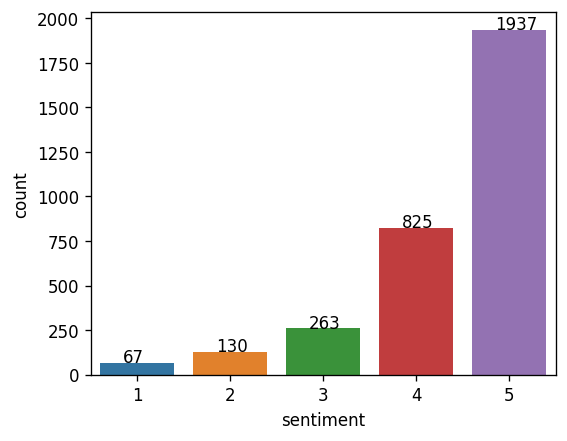

In [61]:
plt.figure(figsize=[5,4])
mpl.rcParams['figure.dpi'] = 120
ax=sns.countplot(data=df,x='sentiment')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()